# BMSID Coding Assignment

### Calculate the coordinates of the 4th Atom D, given the coordinates of the preceding three atoms A, B and C as well as the bond length C-D, bond angle B-C-D and the torsion angle around the bond B-C. 

### Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Main Function

In [2]:
def calculate_atom_d_coordinates(A, B, C, bond_length_CD, bond_angle_BCD, torsion_angle_BC):
    # Convert angles to radians
    bond_angle_BCD = np.radians(bond_angle_BCD)
    torsion_angle_BC = np.radians(torsion_angle_BC)

    # Calculate unit vectors
    AB = normalize(B - A)
    BC = normalize(C - B)

    # Calculate perpendicular vector to BC in the plane defined by AB and BC
    perpendicular_vector = np.cross(AB, BC)

    # Calculate rotation matrix based on bond angle
    rotation_matrix = rotate_matrix(BC, bond_angle_BCD)

    # Rotate perpendicular_vector by the rotation matrix
    rotated_perpendicular_vector = np.dot(rotation_matrix, perpendicular_vector)

    # Scale the rotated perpendicular vector by the bond length to get CD vector
    CD = scale(rotated_perpendicular_vector, bond_length_CD)

    # Create rotation matrix for torsion angle around BC
    torsion_rotation_matrix = rotate_matrix(BC, torsion_angle_BC)

    # Rotate CD vector by the torsion matrix
    rotated_CD = np.dot(torsion_rotation_matrix, CD)

    # Calculate D coordinates
    D = C + rotated_CD

    return D

### Helper Functions

In [3]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

In [4]:
def rotate_matrix(axis, angle):
    # Implement rotation matrix calculation based on axis and angle
    norm_axis = normalize(axis)
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    x, y, z = norm_axis

    rotation_matrix = np.array([
        [cos_angle + (1 - cos_angle) * x**2, (1 - cos_angle) * x * y - sin_angle * z, (1 - cos_angle) * x * z + sin_angle * y],
        [(1 - cos_angle) * x * y + sin_angle * z, cos_angle + (1 - cos_angle) * y**2, (1 - cos_angle) * y * z - sin_angle * x],
        [(1 - cos_angle) * x * z - sin_angle * y, (1 - cos_angle) * y * z + sin_angle * x, cos_angle + (1 - cos_angle) * z**2]
    ])

    return rotation_matrix

In [5]:
def scale(vector, factor):
    return vector * factor

### Lookup Tables

In [6]:
lookup_table = {
    'N': {'coordinates': [0, 0, 0]},
    'CA': {'coordinates': [1.453, 0, 0]},
    'C': {'coordinates': [1.959, -0.628, -1.3]},
    'O': {'coordinates': [1.187, -1.232, -2.044]},
    'CB': {'coordinates': [2.004, -0.822, 1.167]},
    'CG': {'coordinates': [1.597, -2.297, 1.168]},
    'OD1': {'coordinates': [0.546, -2.596, 0.561]},
    'OD2': {'coordinates': [2.347, -3.092, 1.775]},
    'H1': {'coordinates': [-0.338, 0.478, -0.828]},
    'H2': {'coordinates': [-0.338, -0.956, 0]},
    'H3': {'coordinates': [-0.338, 0.478, 0.828]},
    'HA': {'coordinates': [1.739, 1.047, 0.097]},
    'HB2': {'coordinates': [3.092, -0.76, 1.153]},
    'HB3': {'coordinates': [1.671, -0.368, 2.101]}
}

# Example usage
atom_type = 'N'
print("Coordinates of Atom {}: {}".format(atom_type, lookup_table[atom_type]['coordinates']))


Coordinates of Atom N: [0, 0, 0]


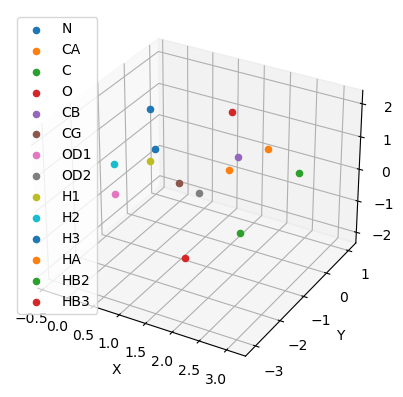

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the coordinates of each atom
for atom_type, atom_data in lookup_table.items():
    coordinates = atom_data['coordinates']
    ax.scatter(coordinates[0], coordinates[1], coordinates[2], label=atom_type)


# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()


### Usage:

In [8]:
A = np.array([0, 0, 0])
B = np.array([1.453, 0, 0])
C = np.array([1.959, -0.628, -1.3])
bond_length_CD = 1.0  # Replace with the actual bond length
bond_angle_BCD = 110.0  # Replace with the actual bond angle
torsion_angle_BC = 120.0  # Replace with the actual torsion angle

D = calculate_atom_d_coordinates(A, B, C, bond_length_CD, bond_angle_BCD, torsion_angle_BC)
print("Coordinates of Atom D:", D)

Coordinates of Atom D: [ 1.27675887 -1.27822427 -1.2514409 ]


Coordinates of Atom D: [ 1.27675887 -1.27822427 -1.2514409 ]


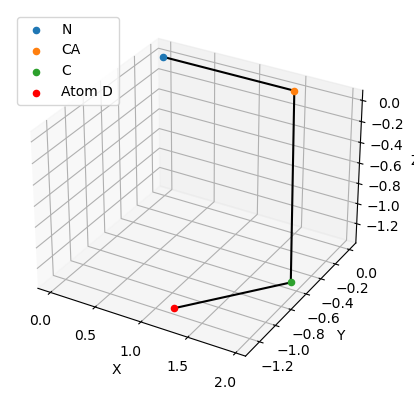

In [9]:
atom1 = input("Enter the name of the first atom: \nList: N, CA, C, O, CB, CG, OD1, OD2, H1, H2, H3, HA, HB2, HB3\n")
atom2 = input("Enter the name of the second atom: \nList: N, CA, C, O, CB, CG, OD1, OD2, H1, H2, H3, HA, HB2, HB3\n")
atom3 = input("Enter the name of the third atom: \nList: N, CA, C, O, CB, CG, OD1, OD2, H1, H2, H3, HA, HB2, HB3\n")

bond_length_CD = input("Enter the bond length between atoms C and D: \nDefault: 1.0\n")
if bond_length_CD == '':
    bond_length_CD = 1.0
bond_angle_BCD = input("Enter the bond angle between atoms B, C, and D: \nDefault: 110.0\n")
if bond_angle_BCD == '':
    bond_angle_BCD = 110.0
torsion_angle_BC = input("Enter the torsion angle between atoms B, C, and D: \nDefault: 120.0\n")
if torsion_angle_BC == '':
    torsion_angle_BC = 120.0

coord1 = np.array(lookup_table[atom1]['coordinates'])
coord2 = np.array(lookup_table[atom2]['coordinates'])
coord3 = np.array(lookup_table[atom3]['coordinates'])

bond_length_CD = 1.0  # Replace with the actual bond length
bond_angle_BCD = 110.0  # Replace with the actual bond angle
torsion_angle_BC = 120.0  # Replace with the actual torsion angle

D = calculate_atom_d_coordinates(coord1, coord2, coord3, bond_length_CD, bond_angle_BCD, torsion_angle_BC)
print("Coordinates of Atom D:", D)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the coordinates of each atom
ax.scatter(coord1[0], coord1[1], coord1[2], label=atom1)
ax.scatter(coord2[0], coord2[1], coord2[2], label=atom2)
ax.scatter(coord3[0], coord3[1], coord3[2], label=atom3)
ax.scatter(D[0], D[1], D[2], color='red', label='Atom D')

ax.plot([coord1[0], coord2[0], coord3[0], D[0]], [coord1[1], coord2[1], coord3[1], D[1]], [coord1[2], coord2[2], coord3[2], D[2]], color='black')
# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.savefig('Mol.png')
plt.show()